# <font color='#FFE15D'>**Week 6: Color Space**</font> 🔴🟢🔵

## <span style="font-size: 0.9em;">🟥</span> **Import**


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pygame

pygame 2.5.2 (SDL 2.28.2, Python 3.11.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
cv2.__version__

'4.6.0'

## <span style="font-size: 0.9em;">🟥</span> **Section 1: Color Spaces**

### <span style="font-size: 0.9em;">🟧</span> **Manipulating Channels**

#### <span style="font-size: 0.9em;">🟨</span> **Example: Thresholding**

In [6]:
def threshold_color_range(image_path, lower_color, upper_color):
    img = cv2.imread(image_path)
    
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Create a binary mask where the specified colors are white and the rest are black
    mask = cv2.inRange(hsv, lower_color, upper_color)
    
    # Apply the mask to the original image
    result = cv2.bitwise_and(img, img, mask=mask)
    
    # Convert images to RGB for displaying with matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    # Display the original image
    axs[0].imshow(img_rgb)
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    
    # Display the mask
    axs[1].imshow(mask, cmap='gray')
    axs[1].set_title('Mask')
    axs[1].axis('off')
    
    # Display the result
    axs[2].imshow(result_rgb)
    axs[2].set_title('Result')
    axs[2].axis('off')
    
    plt.show()

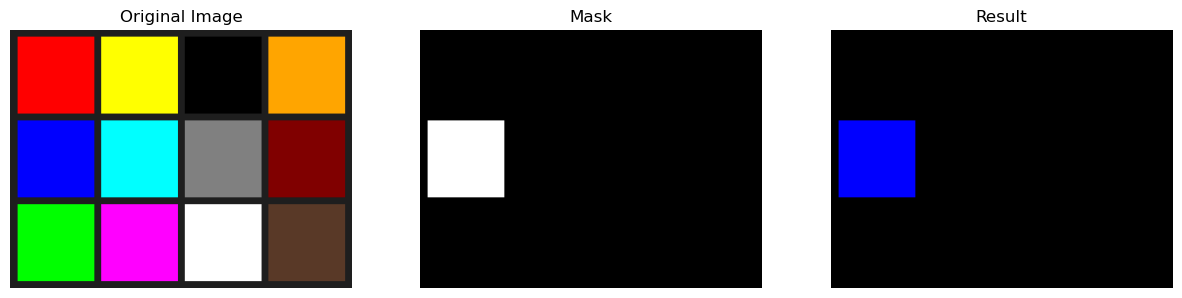

In [7]:
# Extract blue color
lower_blue = np.array([100, 150, 50])
upper_blue = np.array([140, 255, 255])
threshold_color_range('data/color_spaces.png', lower_blue, upper_blue)

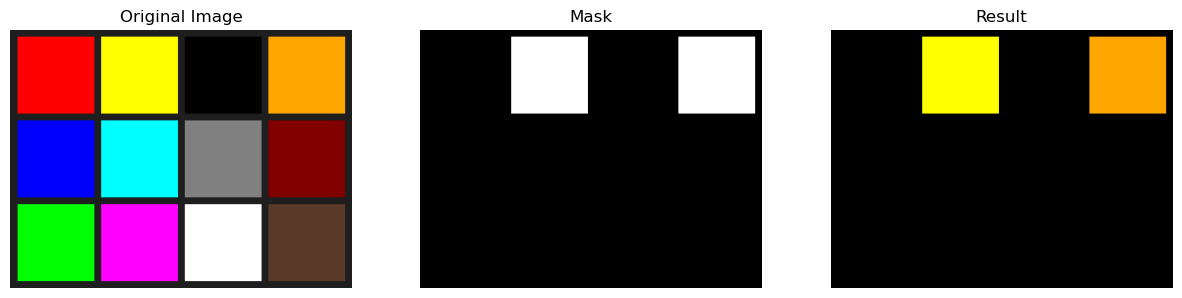

In [8]:
 # Extract yellow color
lower_yellow = np.array([10, 150, 50])
upper_yellow = np.array([40, 255, 255])
threshold_color_range('data/color_spaces.png', lower_yellow, upper_yellow)

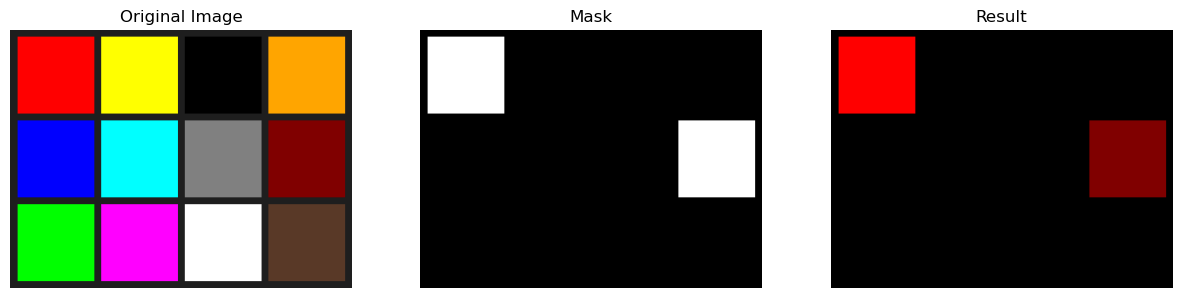

In [10]:
# Extract red color
lower_red = np.array([0, 20, 50])
upper_red = np.array([10, 255, 255])
threshold_color_range('data/color_spaces.png', lower_red, upper_red)

## <span style="font-size: 0.9em;">🟥</span> **Section 2: Mini Projects**

### <span style="font-size: 0.9em;">🟪</span> **Ping Pong**

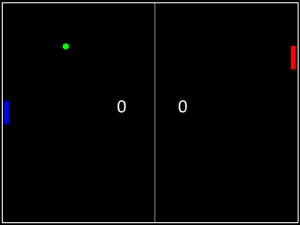

### <span style="font-size: 0.9em;">🟪</span> **Ping Pong**

#### **Create a Ping Pong game using Pygame:**

**1. Initialize Pygame:**
   * Set up the Pygame library and create the game window.

**2. Create Objects:**
   * Define the paddles, ball, and the divider line.

**3.  Handle Input:**
   * Allow player and AI control of the paddles.

**4.  Implement Ball Movement and Collision Detection:**
   * Handle the ball's movement and collisions with paddles and walls.

**5.  Display Scores:**
  * Show the current scores on the screen.

**6.  Update Game State and Render Objects Continuously:**
   * Continuously update the game state and render the objects.

##### Gameplay Details:

* The blue paddle is controlled by the player. The red paddle, controlled by the AI, moves up or down to follow the ball's vertical position.

The game will end when a player reaches the winning score.

 *  **Winning Score:** WINNING_SCORE is set to 5.
 *   **Game Over Flag:** 'game_over' is a flag to indicate whether the game has ended.
 *   **Check Winning Condition:** After updating the scores, check if either player has reached the winning score. If so, set 'game_over' to True and display the winning message.
 *  **Display Winning Message:** When 'game_over' is True, display the winner message and a prompt to restart the game.
 *  **Winning Message Color:** The color of the winning message matches the color of the winning player (BLUE for Player 1 and RED for Player 2).
 * **Restart Game:** Press 'R' to reset the scores and ball position and start a new game.
 *  **Exit Game:** Allow the user to exit the game using the 'Esc' key.

In [6]:
pygame.init()

width, height = 600, 400
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption('Ping Pong')

black = (0, 0, 0)
white = (255, 255, 255)
blue = (0, 0, 255)
red = (255, 0, 0)
green = (0, 255, 0)

paddle_width, paddle_height = 10, 60
ball_size = 10

paddle1_x, paddle1_y = 10, (height // 2) - (paddle_height // 2)
paddle2_x, paddle2_y = width - 20, (height // 2) - (paddle_height // 2)

ball_x, ball_y = width // 2, height // 2
ball_speed_x, ball_speed_y = 5, 5

score1, score2 = 0, 0

winning_score = 5

small_font = pygame.font.Font('freesansbold.ttf', 20)

clock = pygame.time.Clock()

# Detect ball position within a search area
def detect_ball_position(surface, x_start, x_end):
    for y in range(height):
        for x in range(x_start, x_end):
            if surface.get_at((x, y)) == green:
                return y
    return None

running = True
game_over = False

try:
    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            elif event.type == pygame.KEYDOWN:
                if event.key == pygame.K_r and game_over:  # Restart the game
                    score1, score2 = 0, 0
                    ball_x, ball_y = width // 2, height // 2
                    ball_speed_x, ball_speed_y = 5, 5
                    game_over = False
                elif event.key == pygame.K_ESCAPE:  # Exit the game with the Esc key
                    running = False

        if not game_over:
            keys = pygame.key.get_pressed()
            if keys[pygame.K_w] and paddle1_y > 0:
                paddle1_y -= 5
            if keys[pygame.K_s] and paddle1_y < height - paddle_height:
                paddle1_y += 5
    
            # Ball movement
            ball_x += ball_speed_x
            ball_y += ball_speed_y
    
            # Ball collision with top and bottom
            if ball_y <= 0 or ball_y >= height - ball_size:
                ball_speed_y *= -1
    
            # Ball collision with paddles
            if (ball_x <= paddle1_x + paddle_width and paddle1_y < ball_y < paddle1_y + paddle_height) or (ball_x >= paddle2_x - ball_size and paddle2_y < ball_y < paddle2_y + paddle_height):
                ball_speed_x *= -1

            # Ball out of bounds
            if ball_x < 0:
                score2 += 1
                ball_x, ball_y = width // 2, height // 2
                ball_speed_x, ball_speed_y = 5, 5
            elif ball_x > width:
                score1 += 1
                ball_x, ball_y = width // 2, height // 2
                ball_speed_x, ball_speed_y = -5, 5
    
            if score1 >= winning_score:
                game_over = True
                winner_text = "Player 1 Wins!"
                winner_color = blue
            elif score2 >= winning_score:
                game_over = True
                winner_text = "Player 2 Wins!"
                winner_color = red

        screen.fill(black)
        pygame.draw.rect(screen, blue, (paddle1_x, paddle1_y, paddle_width, paddle_height))
        pygame.draw.rect(screen, red, (paddle2_x, paddle2_y, paddle_width, paddle_height))
        pygame.draw.ellipse(screen, green, (ball_x, ball_y, ball_size, ball_size))
        pygame.draw.aaline(screen, white, (width // 2, 0), (width // 2, height))
    
        score_text = small_font.render(str(score1), True, white)
        screen.blit(score_text, (width // 4, 20))
        score_text = small_font.render(str(score2), True, white)
        screen.blit(score_text, (width * 3 // 4, 20))
    
        if game_over:
            winner_surface = small_font.render(winner_text, True, winner_color)
            restart_surface = small_font.render("Press 'R' to Restart or 'Esc' to Exit", True, white)
            screen.blit(winner_surface, (width // 2 - winner_surface.get_width() // 2, height // 2 - winner_surface.get_height() // 2 - 20))
            screen.blit(restart_surface, (width // 2 - restart_surface.get_width() // 2, height // 2 - restart_surface.get_height() // 2 + 20))
    
        pygame.display.flip()

        # AI paddle movement
        if  ball_x > width // 2:
            detected_y = detect_ball_position(screen, width // 2, width)
            if detected_y is not None:
                if paddle2_y + paddle_height // 2 < detected_y:
                    paddle2_y += 5
                elif paddle2_y + paddle_height // 2 > detected_y:
                    paddle2_y -= 5

        clock.tick(60)

except SystemExit:
    pygame.quit()
    print("Exited the game.")
finally:
    pygame.quit()